In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")
import itertools
import timeit

In [2]:
# Linear SVM
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier

In [3]:
# Input file containing data
input_file = 'income_data.txt'

In [4]:
# Read the data
X = []
y = []
count_class1 = 0
count_class2 = 0
max_datapoints = 25000
# dictionaries to benchmark
scores = {}
time = {}

#Pre-processing
with open(input_file, 'r') as f:
    for line in f.readlines():
        if count_class1 >= max_datapoints and count_class2 >= max_datapoints:
            break
        if '?' in line:
            continue

        data = line[:-1].split(', ')

        if data[-1] == '<=50K' and count_class1 < max_datapoints:
            X.append(data)
            count_class1 += 1

        if data[-1] == '>50K' and count_class2 < max_datapoints:
            X.append(data)
            count_class2 += 1
# Convert to numpy array
X = np.array(X)

In [5]:
# Convert string data to numerical data
label_encoder = [] 
X_encoded = np.empty(X.shape)
for i,item in enumerate(X[0]):
    if item.isdigit(): 
        X_encoded[:, i] = X[:, i]
    else:
        label_encoder.append(preprocessing.LabelEncoder())
        X_encoded[:, i] = label_encoder[-1].fit_transform(X[:, i])

X = X_encoded[:, :-1].astype(int)
y = X_encoded[:, -1].astype(int)

In [6]:
# Create SVM classifier
classifier = OneVsOneClassifier(LinearSVC(random_state=0))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [7]:
# Note down start time
start = timeit.default_timer()
# Train the classifier
classifier.fit(X, y)
# Cross validation
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
# Note down stop time
stop = timeit.default_timer()

In [8]:
# Compute the F1 score of the SVM classifier
f1 = cross_val_score(classifier, X, y, scoring='f1_weighted', cv=3)
print("SVM classifier results")
print("F1 score: " + str(round(100*f1.mean(), 2)) + "%")
# Accuracy
a = accuracy_score(y_test_pred,y_test)
print("Accuracy: " + str(a*100) + "%")

SVM classifier results
F1 score: 71.35%
Accuracy: 78.48381036578628%


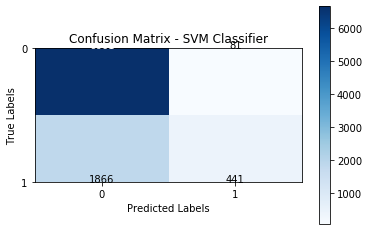

In [9]:
# Confusion matrix
conf_mat = confusion_matrix(y_test,y_test_pred)
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - SVM Classifier')
plt.colorbar()
ticks = np.arange(2)
plt.xticks(ticks,ticks)
plt.yticks(ticks,ticks)

thresh = conf_mat.max()/2.
for i,j in itertools.product(range(conf_mat.shape[0]),range(conf_mat.shape[1])):
    plt.text(j,i,format(conf_mat[i,j],'d'),
            horizontalalignment = "center",
            color="white" if conf_mat[i,j]>thresh else"black")
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [10]:
# Accuracy and Classification report
print(classification_report(y_test_pred,y_test))
print('Time taken for SVM',stop-start)

              precision    recall  f1-score   support

           0       0.99      0.78      0.87      8527
           1       0.19      0.84      0.31       522

    accuracy                           0.78      9049
   macro avg       0.59      0.81      0.59      9049
weighted avg       0.94      0.78      0.84      9049

Time taken for SVM 13.275299517999883


In [11]:
scores['SVM'] = a*100
time['SVM'] = stop-start

In [12]:
# GaussianNB classifier
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

In [13]:
# Note start time
start = timeit.default_timer()
# Train classifier
classifier.fit(X,y)
# predict the values for training data
y_pred = classifier.predict(X)
# Note stop time
stop = timeit.default_timer()

In [14]:
# Computing accuracy and time taken
accuracy = 100*(y == y_pred).sum()/X.shape[0]
print("Gaussian Native Bayes classfier results")
print("Accuracy: " + str(round(accuracy,2)), "%")
print("Time",stop-start)
time['Naive Bayes'] = stop-start

Gaussian Native Bayes classfier results
Accuracy: 78.85 %
Time 0.05354986200018175


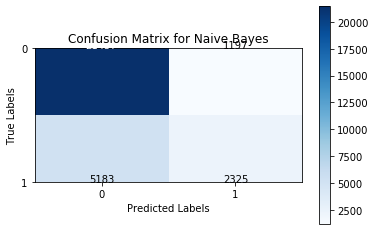

In [15]:
conf_mat = confusion_matrix(y,y_pred)
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Naive Bayes')
plt.colorbar()
ticks = np.arange(2)
plt.xticks(ticks,ticks)
plt.yticks(ticks,ticks)

thresh = conf_mat.max()/2
for i,j in itertools.product(range(conf_mat.shape[0]),range(conf_mat.shape[1])):
    plt.text(j,i, format(conf_mat[i,j],'d'),
             horizontalalignment = 'center',
             color = 'white' if conf_mat[i,j]>thresh else 'black')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [16]:
# Accuracy and Classification of naive bayes
tn, fp, fn, tp = conf_mat.ravel()
print("True Negatives: ",tn)
print("True Positives: ",tp)
print("False Negatives: ",fn)
print("False Positives: ",fp)

Accuracy = (tn+tp)*100/(tp+tn+fp+fn)
print("Accuracy %.2f"%(Accuracy))
scores['Naive Bayes'] = Accuracy

True Negatives:  21457
True Positives:  2325
False Negatives:  5183
False Positives:  1197
Accuracy 78.85


In [17]:
# Classification report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87     22654
           1       0.66      0.31      0.42      7508

    accuracy                           0.79     30162
   macro avg       0.73      0.63      0.65     30162
weighted avg       0.77      0.79      0.76     30162



In [18]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [19]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [20]:
# Note start time
start = timeit.default_timer()
# Train classifier
classifier.fit(x_train,y_train)
# Predict the value of training data
predicted = classifier.predict(x_test)
# Note stop time
stop = timeit.default_timer()
print(predicted)

[0 0 1 ... 0 0 0]


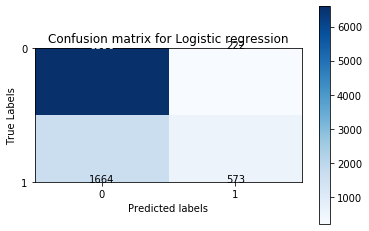

In [21]:
conf_mat = confusion_matrix(y_test,predicted)
plt.imshow(conf_mat, interpolation = 'nearest', cmap=plt.cm.Blues)
plt.title("Confusion matrix for Logistic regression")
plt.colorbar()
ticks = np.arange(2)
plt.xticks(ticks,ticks)
plt.yticks(ticks,ticks)

thresh = conf_mat.max()/2
for i,j in itertools.product(range(conf_mat.shape[0]),range(conf_mat.shape[1])):
    plt.text(j,i,format(conf_mat[i,j],'d'),
            horizontalalignment='center',
            color = 'white' if conf_mat[i,j]>thresh else 'black')
plt.ylabel('True Labels')
plt.xlabel('Predicted labels')
plt.show()

In [22]:
accuracy = accuracy_score(predicted,y_test)
print("Accuracy: " + str(accuracy*100) + "%")
scores['Logistic Regression'] = accuracy*100
print("Time taken", stop-start)
time['Logistic Regression'] = stop-start

Accuracy: 79.15791800198917%
Time taken 0.16229754500000126


In [23]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.80      0.97      0.87      6812
           1       0.72      0.26      0.38      2237

    accuracy                           0.79      9049
   macro avg       0.76      0.61      0.63      9049
weighted avg       0.78      0.79      0.75      9049



In [24]:
# BENCHMARKING THE RESULTS OBTAINED IN DIFFERENT CLASSIFIERS

78.48381036578628 78.8475565280817 79.15791800198917
SVM Naive Bayes Logistic Regression


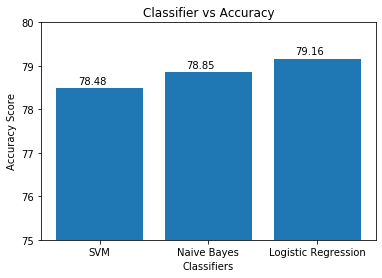

In [50]:
plot_y = np.array(list(scores.keys()))
plot_x = np.array(list(scores.values()))
print(*plot_x,sep = " ")
print(*plot_y,sep = " ")

index = np.arange(len(plot_y))
plt.bar(index,plot_x)
plt.title("Classifier vs Accuracy")
plt.ylabel('Accuracy Score')
plt.xlabel('Classifiers')
plt.xticks(index,plot_y,fontsize = 10)
plt.ylim(75,80)
for i in range(len(index)):
    plt.text(x = i-0.2, y = plot_x[i]+0.1, s = plot_x[i].round(2),size = 10)
plt.show()

13.275299517999883 0.05354986200018175 0.16229754500000126
SVM Naive Bayes Logistic Regression


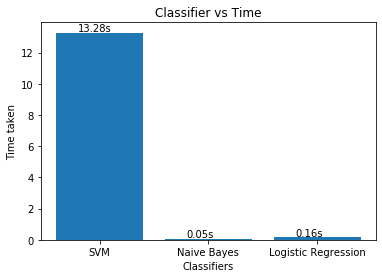

In [52]:
time_x = np.array(list(time.values()))
time_y = np.array(list(time.keys()))
print(*time_x,sep=" ")
print(*time_y,sep=" ")

index = np.arange(len(time_y))
plt.bar(index,time_x)
plt.title("Classifier vs Time")
plt.ylabel('Time taken')
plt.xlabel('Classifiers')
plt.xticks(index,time_y,fontsize = 10)
# plt.ylim(75,80)
for i in range(len(index)):
    plt.text(x = i-0.2, y = time_x[i]+0.1, s = str(time_x[i].round(2))+'s',size = 10)
plt.show()